In [23]:
from sklearn.datasets import fetch_openml
import numpy as np


In [25]:

mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

In [26]:
X = X / 255

In [27]:
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [28]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [29]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

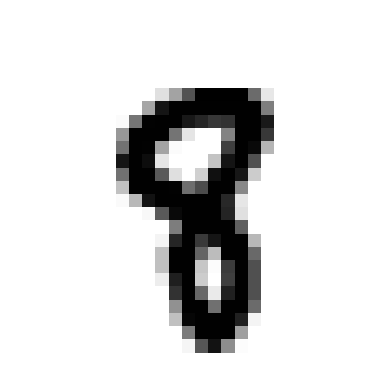

[0.]


In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [33]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [34]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [36]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6678661598220236
Epoch 100 cost:  1.7841763355232894e-05
Epoch 200 cost:  1.7528926283620907e-05
Epoch 300 cost:  1.7227686280123976e-05
Epoch 400 cost:  1.693739316220607e-05
Epoch 500 cost:  1.66574450844331e-05
Epoch 600 cost:  1.6387284095297245e-05
Epoch 700 cost:  1.612639217759866e-05
Epoch 800 cost:  1.587428771188473e-05
Epoch 900 cost:  1.563052231096292e-05
Epoch 1000 cost:  1.5394677980699602e-05
Epoch 1100 cost:  1.5166364568401277e-05
Epoch 1200 cost:  1.4945217465245213e-05
Epoch 1300 cost:  1.4730895533638195e-05
Epoch 1400 cost:  1.4523079234137985e-05
Epoch 1500 cost:  1.432146892980111e-05
Epoch 1600 cost:  1.412578334858717e-05
Epoch 1700 cost:  1.3935758186840982e-05
Epoch 1800 cost:  1.3751144838921028e-05
Epoch 1900 cost:  1.357170923984122e-05
Final cost: 1.3398951748735979e-05


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(labels, predictions, labels=[False, True]))

[[10000     0]
 [    0     0]]


In [40]:
print(classification_report(labels, predictions, target_names=["not-0", "is-0"]))

ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter